### **Aim**  
The motive of this assignment is to make predictions using **Linear Regression**. To make sure you truly understand how the underlying algorithm works, you are to implement it from scratch.

### Generating the dataset  
Run the cell below to create the dataset. It further splits the available data into training and testing. Please do not edit this cell.


In [45]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Generate the data
X, y = datasets.make_regression(n_samples=100, n_features=5, noise=20, random_state=4)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

### Visualizing the data  
Use `matplotlib` to visualize the given data.

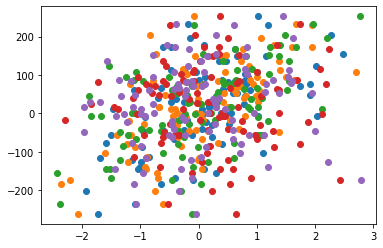

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
# Your code here
X.shape, y.shape
flat=X.flatten()
I=flat[::5]
II=flat[1::5]
III=flat[2::5]
IV=flat[3::5]
V=flat[4::5]


plt.scatter(I,y)
plt.scatter(II,y)
plt.scatter(III,y)
plt.scatter(IV,y)
plt.scatter(V,y)






You should be able to see the linear relations between `y` and the features in vector `X`.

### Gradient Descent Review  
1. ####  Cost function
Define the `cost function` to measure the difference between predictions and target outputs. Here, we are working with first degree polynomial, so derivatives are easy to calculate. ( Linear function `y = wx +b` )  

$$Error = \frac{1}{N}\sum_{i=1}^N (y_i - \overline{y}_i)^2 = \frac{1}{N}\sum_{i=1}^N (y_i - (x_iw+b))^2 $$  

  where `N` is the number of samples  
    


2. #### Compute the derivative
$$\frac{\delta Error}{\delta w} = \frac{2}{N}\sum_{i=1}^N -x_i(y_i -(m  x_i +b ))  $$
$$\frac{\delta Error}{\delta b} = \frac{2}{N}\sum_{i=1}^N -(y_i -(m  x_i +b ))  $$
3. <h4>Update current parameters</h4>
$$ w:= w- learning\_rate \cdot \frac{\delta Error}{\delta w}   $$ 
$$ b:= b- learning\_rate \cdot \frac{\delta Error}{\delta b}   $$ 
4. <h4>Repeat until it fits good enough</h4>


### Model definition

Complete the functions in the class below. Hints provided at appropriate places.

In [15]:
import numpy as np

class LinearRegression:

    # The __init__ is called when we make any object of our class. Here, you are to specify the default values for 
    # Learning Rate, Number of Iterations, Weights and Biases. It doesn't return anything.
    # Hint: Google what a `self pointer` is and figure out how it can be used here.
    def __init__(self, lr=0.001, n_iters=1000,coef_=np.random.randn(5,1),intercept_=0):
        # Your code here
         self.lr = lr
         self.n_iters=1000
         self.coef_ = np.random.random()
         self.intercept_ = np.random.random()

       


    # The following function would be the heart of the model. This is where the training would happen. 
    # You're supposed to iterate and keep on updating the weights and biases according to the steps of Gradient Descent.
    def fit(self, X, y):
        # Gradient Descent code goes here

       def fit(self, X, y):
        self._X = X 
        self._y = y
        
        
       
      
        errors = []
        
        
        for i in range(self.n_iters):
            self.gradient_decend()
            errors.append(self.error())
        return errors
    
    def gradient_decend(self):
        
        d_coef, d_intercept = self.gradient()
        self.coef_ -= d_coef * self.lr
        self.intercept_ -= d_intercept * self.lr
    
    def gradient(self):
        yh = self.predict(self._X) 
        
        d_coef = ((yh - self._y) * self._X).mean()
        d_intercept = (yh - self._y).mean()
        
        return d_coef, d_intercept
        
        
    # This function will be called after our model has been trained and we are predicting on unseen data
    # What is our prediction? Just return that
    def predict(self, X):
        # Code goes here
         return X * self.coef_ + self.intercept_
        
  

       

### Initializing, Training & Predictions

In [16]:
# Now, we make an object of our custom class.
regressor = LinearRegression() # You may pass the custom parameters or let the default values take it ahead

# Call the fit method on the object to train (pass appropriate part of dataset)
regressor.fit(X_train, y_train)


# Now, let's see our what our model predicts
predictions = regressor.predict(X_test) # pass appropriate part of dataset

### Evaluate the model   

Return [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error) & [R2 Score](https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/coefficient-of-determination-r-squared.html#:~:text=%C2%AFy) from the functions below.

In [30]:
 def mean_squared_error(y_true,y_pred):
       # return the mean squared error
     return np.mean(np.square(np.subtract(y_true,y_pred)))
    
def r2_score(y_true, y_pred):
      # return the r2 score
      return 1-((np.sum(np.square(y_true-y_pred)))/(np.sum(np.square(y_true-(np.mean(y_true))))))
          

mse = mean_squared_error(predictions,y_test) # Pass appropriate parts of dataset
print("MSE:", mse)

accu = r2_score(predictions,y_test) # Pass appropriate parts of dataset
print("Accuracy:", accu)

MSE: 4094.932568975969
Accuracy: -3980476.886391359
